## Récupération des statistiques par pays 
- via l'API https://api.covid19api.com/summary

In [131]:
import requests
import json

# Récupération des stats par pays
def stat_country(country):
    url = 'https://api.covid19api.com/summary'
    response = requests.get(url)
    data = response.json()
    for c in data['Countries']:
         if c['Country']== country:
            print("#### ", country, " ####")
            print("Nouveaux cas confirmés en 24h : ", c['NewConfirmed'] )
            print("Total nombre de cas: ", c['TotalConfirmed'])
            print("Nombre de nouveau décès en 24h: ", c['NewDeaths'])
            print("Nombre de total de décès: ", c['TotalDeaths'])
            print("\n")

## Exemple de résultats sur les pays : France, Italie, Espagne

In [163]:
stat_country('France')
stat_country('Italy')
stat_country('Spain')

####  France  ####
Nouveaux cas confirmés en 24h :  2978
Total nombre de cas:  25600
Nombre de nouveau décès en 24h:  231
Nombre de total de décès:  1333


####  Italy  ####
Nouveaux cas confirmés en 24h :  5210
Total nombre de cas:  74386
Nombre de nouveau décès en 24h:  683
Nombre de total de décès:  7503


####  Spain  ####
Nouveaux cas confirmés en 24h :  9630
Total nombre de cas:  49515
Nombre de nouveau décès en 24h:  839
Nombre de total de décès:  3647


####  US  ####
Nouveaux cas confirmés en 24h :  12038
Total nombre de cas:  65778
Nombre de nouveau décès en 24h:  236
Nombre de total de décès:  942




## Récupération des données de cas confirmés par pays
- via l'api https://api.covid19api.com/total/country/spain/confirmed

In [149]:
def total_case_confirmed_by_country(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/confirmed"
    response = requests.get(url)
    data = response.json()
    confirmed = []
    for d in data:
        last = d['Cases']
        confirmed.append(last)
    return confirmed

## Exemple d'utilisation graphique
- sans décalage pour la France

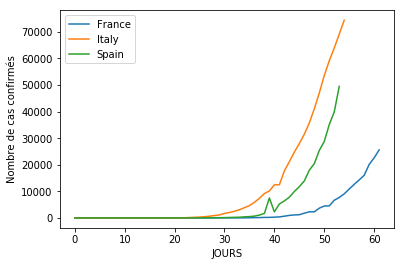

In [161]:
plt.plot(total_case_confirmed_by_country("France"), label='France')
plt.plot(total_case_confirmed_by_country("Italy"), label='Italy')
plt.plot(total_case_confirmed_by_country("Spain"), label='Spain')
plt.ylabel('Nombre de cas confirmés')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des données de nouveaux cas confirmés par pays
- via l'api https://api.covid19api.com/total/country/spain/confirmed

In [158]:
def new_case_confirmed_by_country_per_day(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/confirmed"
    response = requests.get(url)
    data = response.json()
    nb_case = 0
    cpt = 0
    confirmed = []
    for d in data:
        cpt = cpt+1
        last = d['Cases']
        new = last - nb_case
        nb_case = last
    
        confirmed.append(new)
    return confirmed

## Exemple d'utilisation graphique
- sans décalage de données pour la France

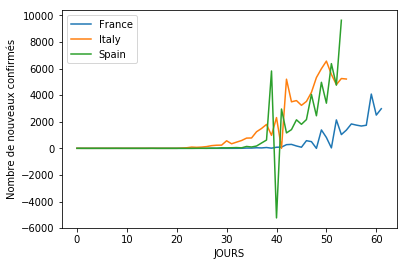

In [159]:
plt.plot(new_case_confirmed_by_country_per_day("France"), label='France')
plt.plot(new_case_confirmed_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_confirmed_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux confirmés')
plt.xlabel('JOURS')
plt.legend()
plt.show()

- Avec 11 jours de décalage pour la France pour affiner la tendance avec les deux autres pays

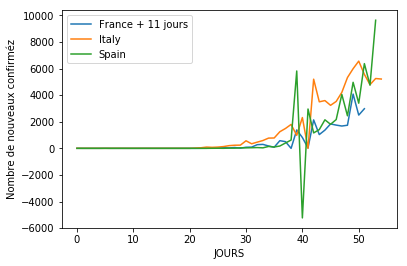

In [160]:
plt.plot(new_case_confirmed_by_country_per_day("France")[10:], label='France + 11 jours')
plt.plot(new_case_confirmed_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_confirmed_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux confirméz')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des décès totaux par pays

In [153]:
def total_case_death_by_country(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/deaths"
    response = requests.get(url)
    data = response.json()
    deaths = []
    for d in data:
        last = d['Cases']
        deaths.append(last)
    return deaths

## Exemple d'utilisation graphique
- sans décalage pour la france

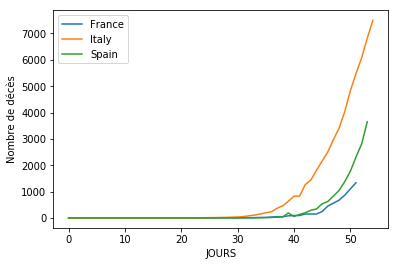

In [162]:
plt.plot(total_case_death_by_country("France")[10:], label='France')
plt.plot(total_case_death_by_country("Italy"), label='Italy')
plt.plot(total_case_death_by_country("Spain"), label='Spain')
plt.ylabel('Nombre de décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des données de nouveaux décès par pays
- via l'API https://api.covid19api.com/total/country/spain/status/deaths

In [134]:
def new_case_death_by_country_per_day(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/deaths"
    response = requests.get(url)
    data = response.json()
    nb_case = 0
    cpt = 0
    deaths=[]
    for d in data:
        cpt = cpt
        last = d['Cases']
        new = last - nb_case
        nb_case = last
        deaths.append(new)
    return deaths

## Exemple d'utilisation graphique
- avec décalage de 11 jours pour la France

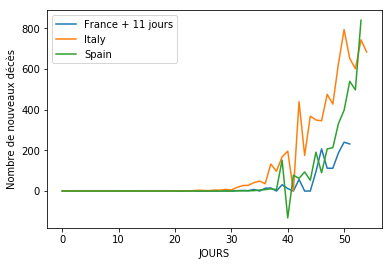

In [155]:
# affichage des 3 courbes décés : France, Italie, Espagne
plt.plot(new_case_death_by_country_per_day("France")[10:], label='France + 11 jours')
plt.plot(new_case_death_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_death_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Comparaison avec la Chine

In [175]:
stat_country('China')

####  China  ####
Nouveaux cas confirmés en 24h :  70
Total nombre de cas:  81661
Nombre de nouveau décès en 24h:  4
Nombre de total de décès:  3285




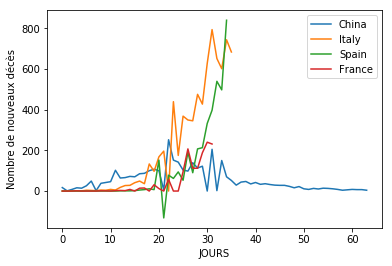

In [173]:
plt.plot(new_case_death_by_country_per_day("China"), label='China')
plt.plot(new_case_death_by_country_per_day("Italy")[19:], label='Italy')
plt.plot(new_case_death_by_country_per_day("Spain")[19:], label='Spain')
plt.plot(new_case_death_by_country_per_day("France")[30:], label='France')
plt.ylabel('Nombre de nouveaux décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

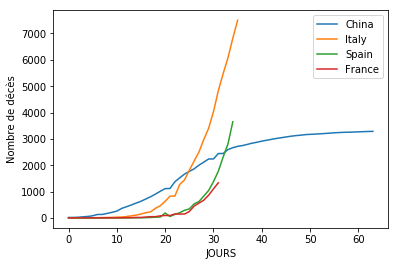

In [174]:
plt.plot(total_case_death_by_country("China"), label='China')
plt.plot(total_case_death_by_country("Italy")[19:], label='Italy')
plt.plot(total_case_death_by_country("Spain")[19:], label='Spain')
plt.plot(total_case_death_by_country("France")[30:], label='France')
plt.ylabel('Nombre de décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()